<a href="https://colab.research.google.com/github/evymonteiro/ARTE_DOS_DADOS/blob/main/trabalho3/TRABALHO_3_ARTE_DOS_DADOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Terceiro trabalho realizado para o Instituto Arte dos Dados.**

Abaixo a pipeline do que será executado:

Objetivo: Construir um modelo de classificação para predição dos sinistros.

**Tarefas:**

*   Aplicar lowercase em todas as colunas; ✅
*   Excluir caracteres especiais dos nomes das colunas; ✅
*   Tratamento dos outliers; ✅
*   Tratamento dos missing values; ✅
*   Lidar com dados categóricos; ✅
*   Fazer EDA; ✅
*   Seleção de features;
*   Definir as amostras de treinamento e validação;
*   Escolher o algoritmo a ser aplicado;
*   Métricas de performance dos algoritmos;
*   Selecionar o melhor modelo preditivo;

# **Inserindo os Dados**

In [1]:
# Bibliotecas iniciais
from google.colab import files
import pandas as pd

### Adicionando dados raw

path_file_1 = 'https://raw.githubusercontent.com/evymonteiro/ARTE_DOS_DADOS/main/data/Car_Insurance_Claim.csv'
path_file_2 = 'https://raw.githubusercontent.com/evymonteiro/ARTE_DOS_DADOS/main/data/sample_submission.csv'

df_claim = pd.read_csv(path_file_1, sep=',')
df_claim.head()
df_sample = pd.read_csv(path_file_2, sep=',')
df_sample.head()


# Analisando as 5 primeiras linhas do dataframe para verificar a importação.
print(df_claim.head())
print(df_sample.head())

       ID    AGE  GENDER      RACE DRIVING_EXPERIENCE    EDUCATION  \
0  569520    65+  female  majority               0-9y  high school   
1  750365  16-25    male  majority               0-9y         none   
2  199901  16-25  female  majority               0-9y  high school   
3  478866  16-25    male  majority               0-9y   university   
4  731664  26-39    male  majority             10-19y         none   

          INCOME  CREDIT_SCORE  VEHICLE_OWNERSHIP VEHICLE_YEAR  MARRIED  \
0    upper class      0.629027                1.0   after 2015      0.0   
1        poverty      0.357757                0.0  before 2015      0.0   
2  working class      0.493146                1.0  before 2015      0.0   
3  working class      0.206013                1.0  before 2015      0.0   
4  working class      0.388366                1.0  before 2015      0.0   

   CHILDREN  POSTAL_CODE  ANNUAL_MILEAGE VEHICLE_TYPE  SPEEDING_VIOLATIONS  \
0       1.0        10238         12000.0        se

# Interpretação do significado de cada variável

* ID - Código único de identificação do cliente/apólice.

* AGE - Faixa etária do motorista principal.

* GENDER - Gênero do motorista.

* RACE - Classificação racial/étnica - minoria ou não.

* DRIVING_EXPERIENCE - Tempo de experiência de direção em anos.

* EDUCATION - Nível de escolaridade.

* INCOME - Faixa de renda do cliente.

* CREDIT_SCORE - Pontuação de crédito do cliente, usada como indicador de responsabilidade.

* VEHICLE_OWNERSHIP - Indica se o cliente possui um veículo (1) ou não (0).

* VEHICLE_YEAR - Indica se o veículo é novo (após 2015) ou antigo (antes de 2015).

* MARRIED - Indica se o cliente é casado (1) ou não (0).

* CHILDREN - Indica se o cliente tem filhos (1) ou não (0).

* POSTAL_CODE - Código postal de residência.

* ANNUAL_MILEAGE - Quilometragem anual estimada do veículo.

* VEHICLE_TYPE - Tipo de veículo (sedan, sports car).

* SPEEDING_VIOLATIONS - Contagem de infrações por excesso de velocidade registradas.

* DUIS - Contagem de condenações por dirigir sob a influência de álcool/drogas.

* PAST_ACCIDENTS - Contagem de acidentes anteriores nos quais o condutor esteve envolvido.

* OUTCOME - Variável alvo: Indica se ocorreu um sinistro/reclamação (1) ou não (0).




# **EDA - Explorando os dados**

Nesta parte, pretende-se conhecer inicialmente o que temos em nosso banco de dados, quais problemas iniciais teremos de lidar, **se possuímos valores faltantes, valores nulos, caracteres especiais e também os valores únicos**, pensando na presença de outliers, valores muito divergentes entre si ou identificação de valores booleanos. Como  disse, trata-se de uma análise inicial, posteriormente será verificado de forma estatística se há ou não outliers e demais informações sobre os dados.
> A função definida abaixo "*analise_exploratoria*" foi construída utilizando *if* e *else*, afim de procurar problemas iniciais que listamos anteriormente, E se na confirmação destes, explicitar onde e quais são.

In [2]:
import pandas as pd

def analise_exploratoria(dataframe, nome_do_df):
    """
    Análise exploratória inicial para um df.

    """
    print(f"--- Análise Exploratória para: {nome_do_df} ---")

    # Visão geral da estrutura (info())
    print("\n1. Visão geral da estrutura (info()):")
    dataframe.info()

    # Análise de valores nulos
    print("\n2. Valores nulos por coluna:")
    valores_nulos = dataframe.isnull().sum()
    porcentagem_nulos = (dataframe.isnull().sum() / len(dataframe)) * 100
    df_nulos = pd.DataFrame({'Valores Nulos': valores_nulos, 'Porcentagem (%)': porcentagem_nulos})

    if df_nulos['Valores Nulos'].sum() == 0:
        print("Não existem valores Nulos ou NA ou vazios.")
    else:
        print(df_nulos[df_nulos['Valores Nulos'] > 0].sort_values(by='Porcentagem (%)', ascending=False))

    # Análise de valores únicos
    print("\n3. Valores únicos por coluna:")
    for coluna in dataframe.columns:
        num_unicos = dataframe[coluna].nunique()
        print(f"\n- Coluna '{coluna}': {num_unicos} valores únicos")

        if num_unicos <= 50:
            print("  Valores únicos:", dataframe[coluna].unique())
        else:
            print("  Valores mais frequentes:")
            print(dataframe[coluna].value_counts().head(10))

    # Verificação de caracteres especiais nas colunas de texto
    print("\n4. Verificação de caracteres especiais nas colunas de texto:")
    for coluna in dataframe.select_dtypes(include='object').columns:
        mascara = dataframe[coluna].astype(str).str.contains(r'[^\w\s.,-]', na=False, regex=True)

        if mascara.any():
            print(f"  - A coluna '{coluna}' contém caracteres especiais.")
            valores_com_caracteres = dataframe.loc[mascara, coluna].unique()
            print("    Exemplos de valores com caracteres especiais:", valores_com_caracteres[:5])
        else:
            print(f"  - A coluna '{coluna}' não contém caracteres especiais.")

# Chama a função que foi definida anteriormente
analise_exploratoria(df_claim, 'DataFrame Claim (df_claim)')
print("\n" + "="*100 + "\n")
analise_exploratoria(df_sample, 'DataFrame de Sample (df_sample)')
print("\n" + "="*100 + "\n")

--- Análise Exploratória para: DataFrame Claim (df_claim) ---

1. Visão geral da estrutura (info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null  

Os dados foram exportados corretamente, 19 colunas para o arquivo df_claim e duas colunas para o arquivo df_sample.

Comentários sobre os dados:

**Dados df_claim:**

1. Tipos de dados:

Como dados booleanos temos:

* GENDER ('female', 'male') *#categorico*
* RACE ('majority', 'minority') *#categorico*
* VEHICLE_OWNERSHIP (1., 0.)
* VEHICLE_YEAR ('before 2015' < 'after 2015')  *#Aqui ainda pode ser considerado ordinal.*
* MARRIED (0., 1.)
* CHILDREN (1., 0.)
* VEHICLE_TYPE ('sedan', 'sports car') *#categorico*
* OUTCOME (0., 1.)

>RACE: Garantir a representatividade: Em alguns casos, é usada para garantir que os modelos de risco sejam justos e não penalizem injustamente grupos minoritários.

Como dados númericos temos:

* CREDIT_SCORE	*#contagem contínuo*
* ANNUAL_MILEAGE	*#contagem contínuo*
* SPEEDING_VIOLATIONS	*#contagem discreto*
* PAST_ACCIDENTS *#contagem discreto*
* DUIS *#contagem discreto*
* POSTAL_CODE *#identificador*

Variáveis categóricas ordinais:

* AGE	('16-25' < '26-39' < '40-64' < '65+') *#intervalar*
* DRIVING_EXPERIENCE	('0-9y' < '10-19y' < '20-29y' < '30y+') *#intervalar*
* EDUCATION	('none' < 'high school' < 'university')
* INCOME	('poverty' < 'working class' < 'middle class' < 'upper class')

2. Valores nulos por coluna:
> Valores Nulos:  
CREDIT_SCORE-              982             
ANNUAL_MILEAGE-            957  

3. Verificação de caracteres especiais nas colunas de texto:
  - A coluna 'AGE' contém caracteres especiais.

    *Exemplos de valores com caracteres especiais: ['65+']*

  - A coluna 'DRIVING_EXPERIENCE' contém caracteres especiais.

    *Exemplos de valores com caracteres especiais: ['30y+']*

**Dados df_sample:**

Além disso, no dataframe sample, possui apenas duas colunas:
ID que é númerica e serve de identificador e
is_claim que é uma variável booleana que indica se houve sinistro (1) ou não (0). Não existem valores nulos ou caracteres especiais.


# Atualizaçoes no banco de dados:

**Transformando em dados silver:**



---



**1. Padronização do nome das colunas:**

In [3]:
print("\n1. Limpeza Dataset Claim")

# Nomes das colunas
print(df_claim.columns)
print("-" * 30)

# Transformações nos nomes das colunas
df_claim.columns = df_claim.columns.str.lower()
df_claim.columns = df_claim.columns.str.replace(' ', '_', regex=False)
df_claim.columns = df_claim.columns.str.replace('[^a-zA-Z0-9_]', '', regex=True)

# Nomes das colunas após a limpeza
print("Nomes das colunas após a limpeza:")
print(df_claim.columns)

###############################################################

# Ver os nomes das colunas antes da limpeza

print("\n2. Limpeza Dataset Sample")

print(df_sample.columns)
print("-" * 30)

# Transformações nos nomes das colunas
df_sample.columns = df_sample.columns.str.lower()
df_sample.columns = df_sample.columns.str.replace(' ', '_', regex=False)
df_sample.columns = df_sample.columns.str.replace('[^a-zA-Z0-9_]', '', regex=True)

# Nomes das colunas após a limpeza
print("Nomes das colunas após a limpeza:")
print(df_sample.columns)


1. Limpeza Dataset Claim
Index(['ID', 'AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION',
       'INCOME', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR',
       'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE',
       'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME'],
      dtype='object')
------------------------------
Nomes das colunas após a limpeza:
Index(['id', 'age', 'gender', 'race', 'driving_experience', 'education',
       'income', 'credit_score', 'vehicle_ownership', 'vehicle_year',
       'married', 'children', 'postal_code', 'annual_mileage', 'vehicle_type',
       'speeding_violations', 'duis', 'past_accidents', 'outcome'],
      dtype='object')

2. Limpeza Dataset Sample
Index(['policy_id', 'is_claim'], dtype='object')
------------------------------
Nomes das colunas após a limpeza:
Index(['policy_id', 'is_claim'], dtype='object')


**2. Remoção dos valores nulos:**

Conforme foi visto na análise exploratória inicial, as colunas credit_score e annual_mileage possuía valores nulos.
Abaixo a função para remover estes valores.

In [4]:
import pandas as pd

# Remove as linhas onde há NaN em 'credit_score' ou 'annual_mileage'
df_claim_raw = df_claim.copy()
df_claim = df_claim.dropna(subset=['credit_score', 'annual_mileage'])

print(f"Número de linhas ANTES da remoção de nulos: {len(df_claim_raw)}")
print(f"Número de linhas DEPOIS da remoção de nulos: {len(df_claim)}")

Número de linhas ANTES da remoção de nulos: 10000
Número de linhas DEPOIS da remoção de nulos: 8149


**3. Padronização dos dados das colunas: remoção de espaços e remoção de caracteres especiais.**

In [5]:
import pandas as pd
import numpy as np

# colunas a padronizar
colunas_para_padronizar = [
    'age',
    'driving_experience',
    'vehicle_year',
    'income',
    'education',
    'vehicle_type'
]

print("-" * 100)
print("Padronização dos valores nas colunas")
print("-" * 100)


for col in colunas_para_padronizar:
    if col in df_claim.columns:
        # 1. Converte para string
        df_claim[col] = df_claim[col].astype(str)

        if col == 'age':
            df_claim[col] = df_claim[col].str.replace('+', '', regex=False)

        elif col == 'driving_experience':
            # Remove 'y' e '+', e substitui '-' por '_'
            df_claim[col] = (df_claim[col].str.replace('y', '', regex=False)
                                         .str.replace('+', '', regex=False))

        elif col in ['vehicle_year', 'income', 'education', 'vehicle_type']:
            df_claim[col] = df_claim[col].str.replace(' ', '_', regex=False)
    else:
        print(f"  - A coluna '{col}' não foi encontrada no DataFrame. Pulando.")

print("\n Padronização de valores concluída.")

print("\nNovos valores únicos da coluna 'age':", df_claim['age'].unique())
print("Novos valores únicos da coluna 'driving_experience':", df_claim['driving_experience'].unique())
print("Novos valores únicos da coluna 'income':", df_claim['income'].unique())

----------------------------------------------------------------------------------------------------
Padronização dos valores nas colunas
----------------------------------------------------------------------------------------------------

 Padronização de valores concluída.

Novos valores únicos da coluna 'age': ['65' '16-25' '26-39' '40-64']
Novos valores únicos da coluna 'driving_experience': ['0-9' '10-19' '20-29' '30']
Novos valores únicos da coluna 'income': ['upper_class' 'poverty' 'working_class' 'middle_class']


# EDA - Estatística

**Boxplot**

Gerando Boxplots


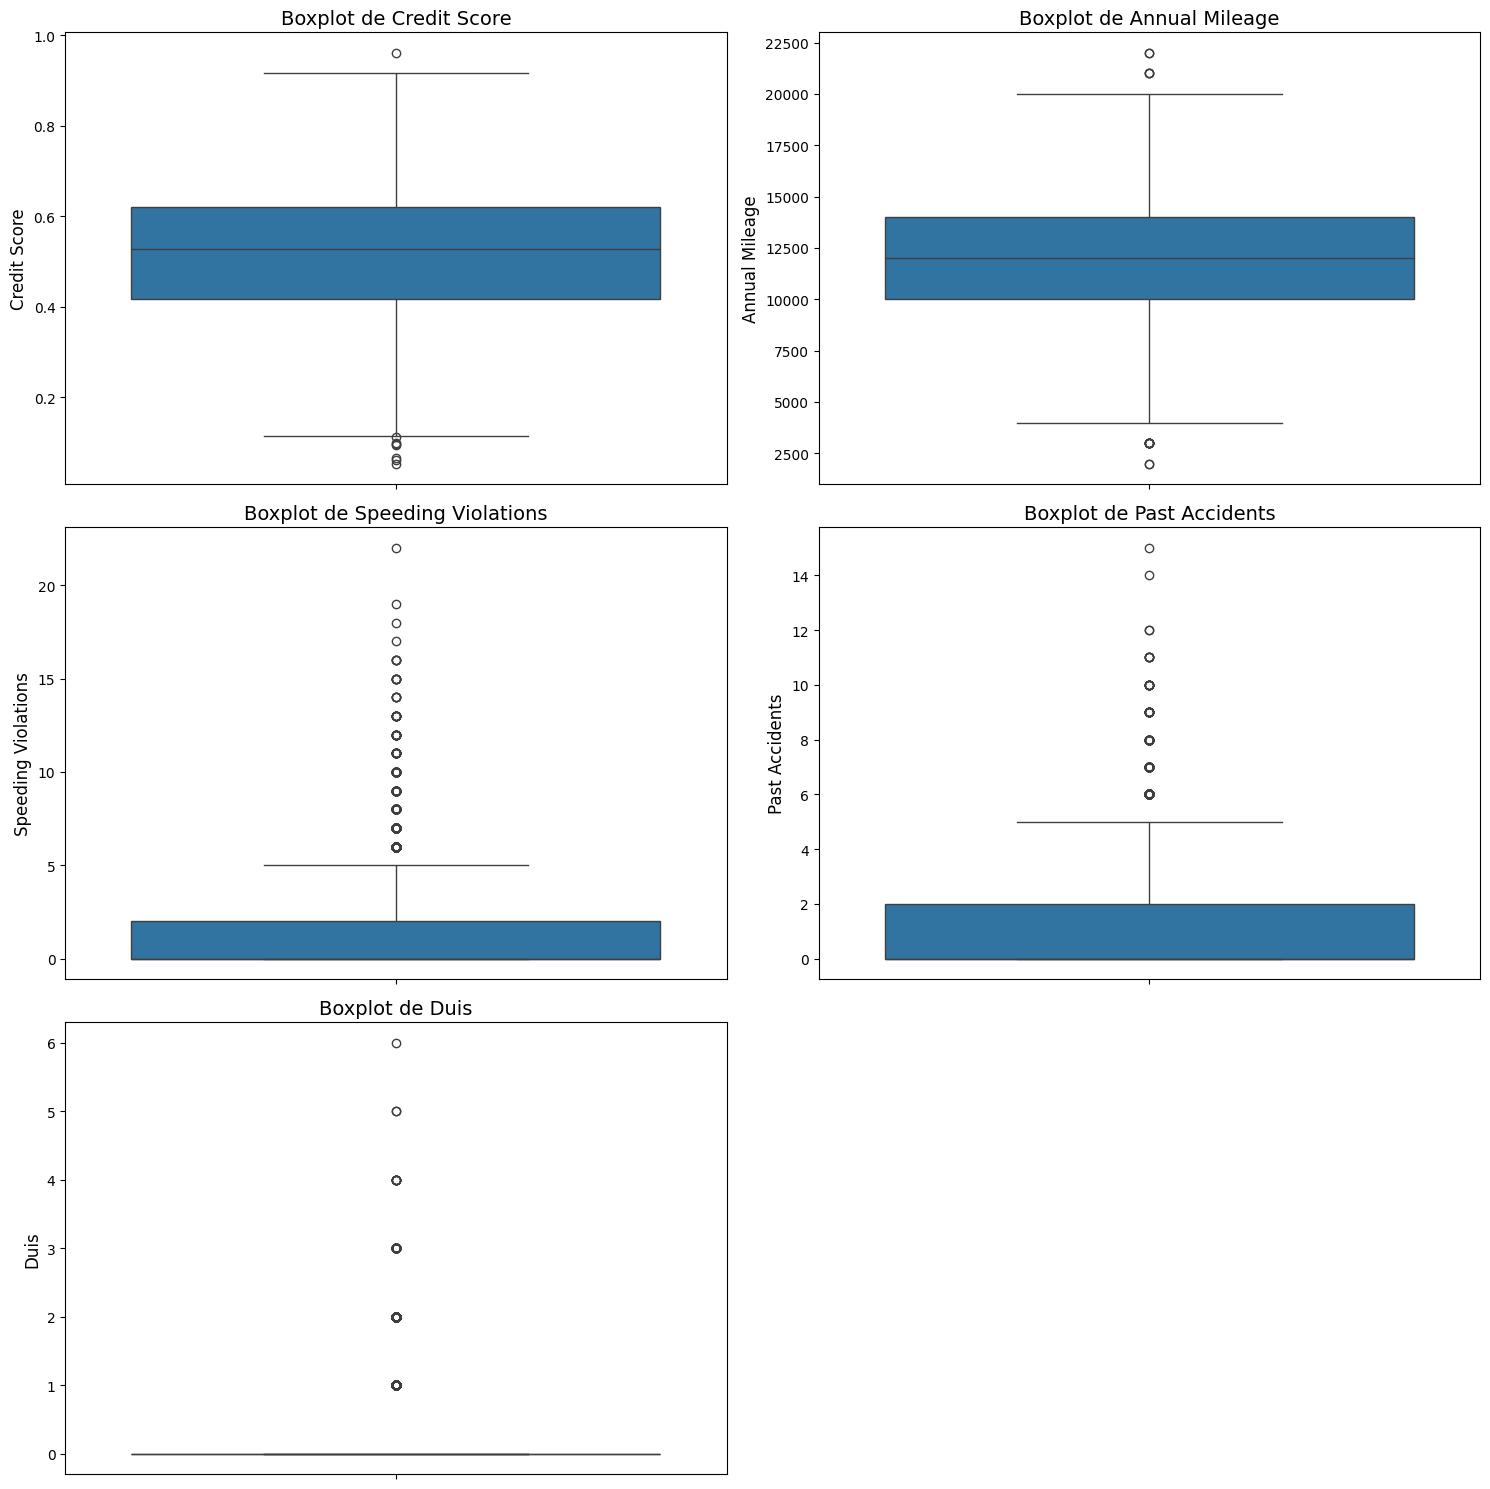

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

colunas_numericas = [
    'credit_score',
    'annual_mileage',
    'speeding_violations',
    'past_accidents',
    'duis'
]

# GERAÇÃO DOS BOXPLOTS ---

# Define o número de plots e a estrutura da figura

num_plots = len(colunas_numericas)
nrows_calc = (num_plots + 1) // 2

# Cria a figura e os subplots
fig, axes = plt.subplots(nrows=nrows_calc, ncols=2, figsize=(15, 5 * nrows_calc))
axes = axes.flatten()

print("Gerando Boxplots")

# Gera um boxplot em cada eixo
for i, coluna in enumerate(colunas_numericas):
    sns.boxplot(y=df_claim[coluna], ax=axes[i])

    axes[i].set_title(f'Boxplot de {coluna.replace("_", " ").title()}', fontsize=14)
    axes[i].set_ylabel(coluna.replace("_", " ").title(), fontsize=12) # Rótulo no eixo Y
    axes[i].set_xlabel('')

# evita a exibição de eixos vazios no final do layout.
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() # Ajusta automaticamente os parâmetros de subplot para que caibam na área da figura
plt.show()


Por meio dos boxplots, foi constatado a presença de outliers em todas as variáveis numéricas, entretanto, esses outliers precisam ser analisados com mais cautela, uma vez que podem ser representativos da amostra. Nem sempre porque uma observação é dada como um outlier que ela precisa ser removida. Posteriormente será realizado outros testes para confirmar ou não a existência desses outliers.

**Histograma**

--------------------------------------------------
Gerando Histogramas de Densidade
--------------------------------------------------


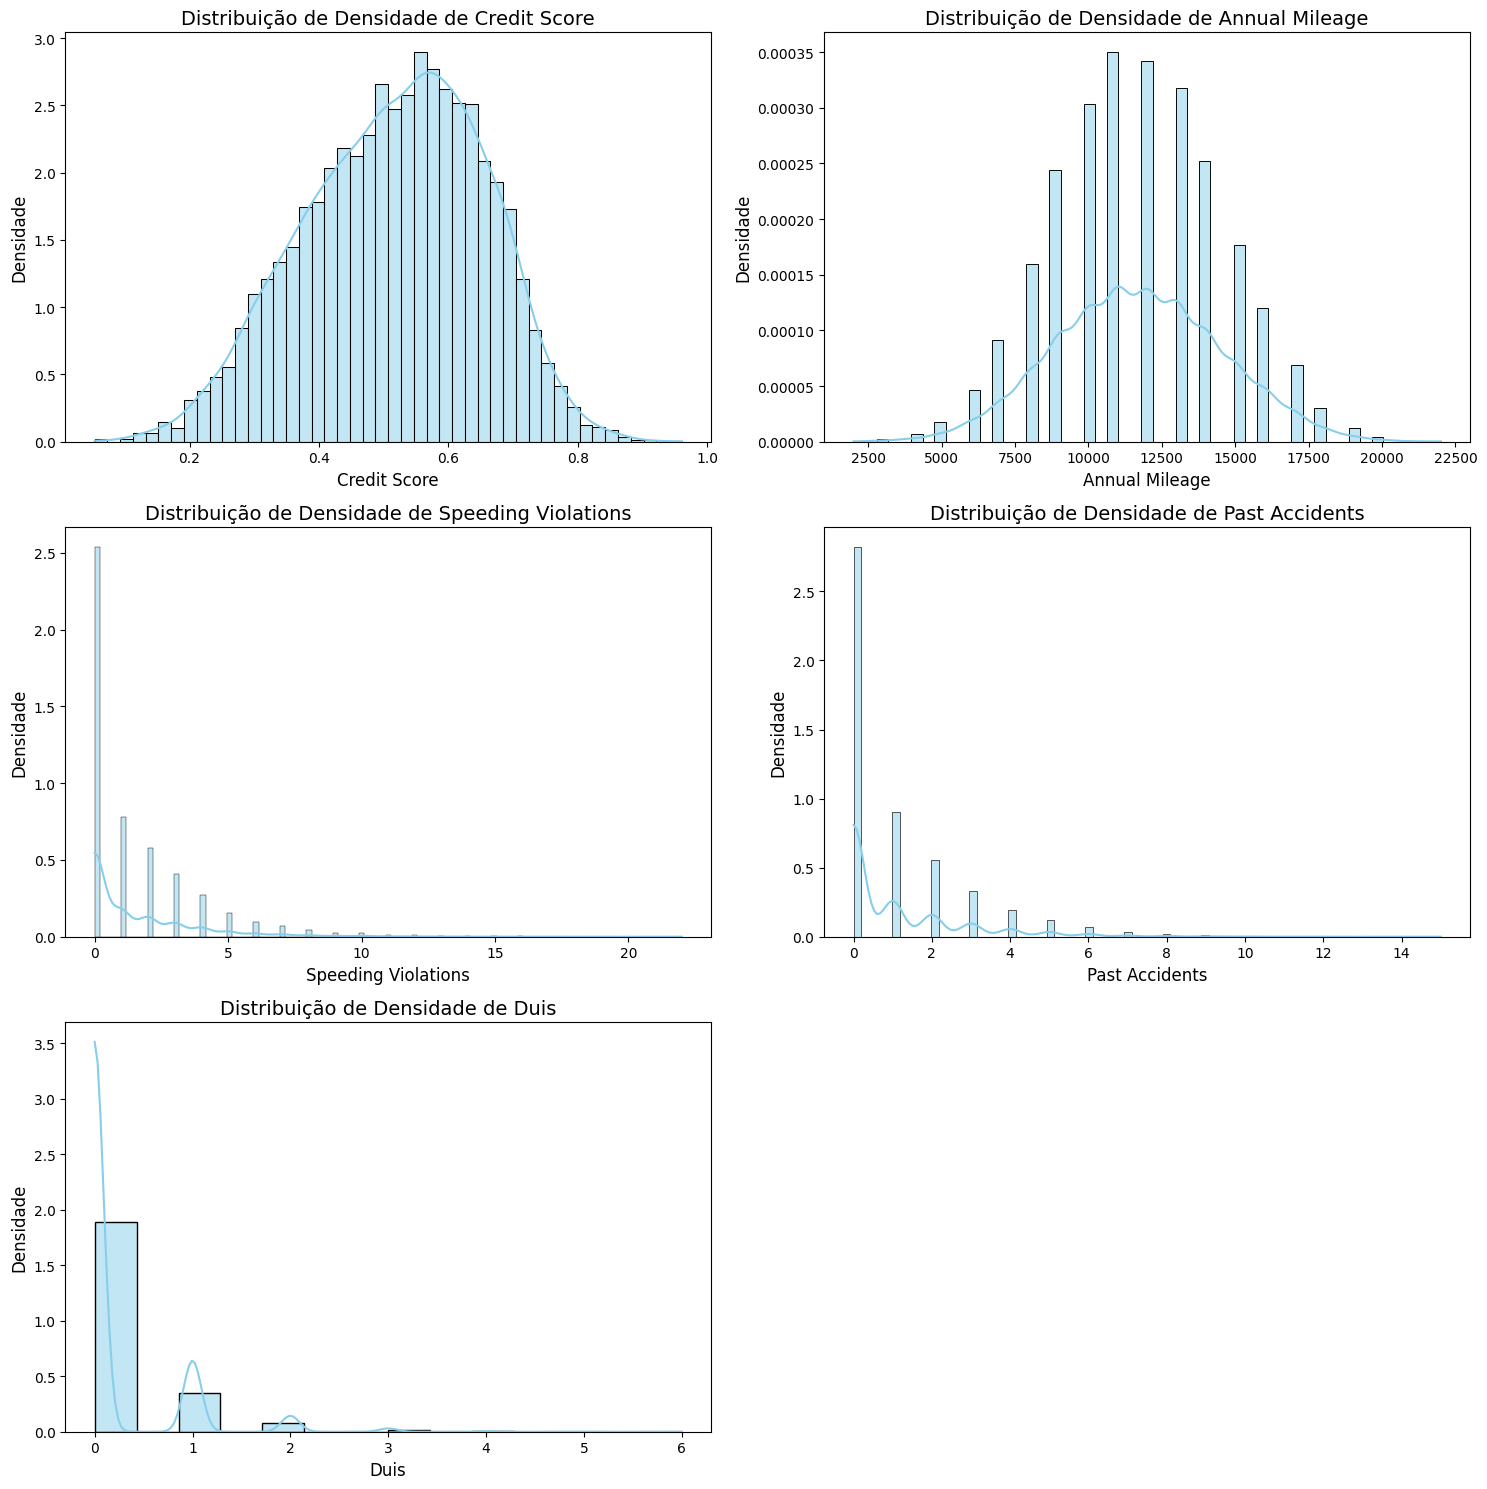

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cria a figura e os subplots
fig, axes = plt.subplots(nrows=nrows_calc, ncols=2, figsize=(15, 5 * nrows_calc))
axes = axes.flatten()

print("-" * 50)
print("Gerando Histogramas de Densidade")
print("-" * 50)

for i, coluna in enumerate(colunas_numericas):
    sns.histplot(x=df_claim[coluna], kde=True, stat='density', ax=axes[i], color='skyblue')

    # Formatação dos rótulos e títulos
    title_name = coluna.replace("_", " ").title()
    axes[i].set_title(f'Distribuição de Densidade de {title_name}', fontsize=14)
    axes[i].set_xlabel(title_name, fontsize=12) # Rótulo no eixo X
    axes[i].set_ylabel('Densidade', fontsize=12)  # Rótulo do eixo Y ajustado para Densidade


# Remove subplots extras
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()


Os gráficos das colunas de credit_score e anual_mileage sugerem uma distribuição normal, enquanto as outras variáveis se assemelham a uma distribuição exponencial.
Testes estatísticos como shapiro.wilk podem ajudar a determinar a distribuição.
Transformações numéricas também podem ser aplicadas afim de deixar os dados normalizados.

**Sumary - Describe**

In [8]:
import pandas as pd

print("-" * 50)
print("Sumário Estatístico")
print("-" * 50)

# Aplica o .describe() e usa .T para transpor (melhor visualização)
sumario_descritivo = df_claim[colunas_numericas].describe().T

print(sumario_descritivo)

--------------------------------------------------
Sumário Estatístico
--------------------------------------------------
                      count          mean          std          min  \
credit_score         8149.0      0.516368     0.137684     0.053358   
annual_mileage       8149.0  11693.459320  2822.351470  2000.000000   
speeding_violations  8149.0      1.485581     2.244711     0.000000   
past_accidents       8149.0      1.065530     1.665623     0.000000   
duis                 8149.0      0.240766     0.557408     0.000000   

                              25%           50%           75%           max  
credit_score             0.417891      0.526759      0.620074      0.960819  
annual_mileage       10000.000000  12000.000000  14000.000000  22000.000000  
speeding_violations      0.000000      0.000000      2.000000     22.000000  
past_accidents           0.000000      0.000000      2.000000     15.000000  
duis                     0.000000      0.000000      0.000000

**Teste de Normalidade**

In [9]:
import pandas as pd
from scipy.stats import shapiro
import numpy as np

print("-" * 50)
print("Teste de Normalidade de Shapiro-Wilk")
print("-" * 50)
print("H0: Os dados são normais vs. H1: Os dados não são normais.")
print("-" * 50)
print("Interpretação: Se P-Valor for menor do que 0.05, rejeita-se H0.")
print("-" * 50)


resultados_shapiro = {}

for coluna in colunas_numericas:
    dados = df_claim[coluna]

    # Executa o teste de Shapiro-Wilk
    shapiro_test, p_valor = shapiro(dados)

    resultados_shapiro[coluna] = {
        'Shapiro Test Statistic': shapiro_test,
        'P-Valor': p_valor
    }

df_resultados = pd.DataFrame(resultados_shapiro).T

# DataFrame de resultados para melhor visualização
df_resultados['Shapiro Test Statistic'] = df_resultados['Shapiro Test Statistic'].map('{:.5f}'.format)
df_resultados['P-Valor'] = df_resultados['P-Valor'].map('{:.5e}'.format) ##notação cientifica

print(df_resultados.to_markdown())
print("-" * 50)

--------------------------------------------------
Teste de Normalidade de Shapiro-Wilk
--------------------------------------------------
H0: Os dados são normais vs. H1: Os dados não são normais.
--------------------------------------------------
Interpretação: Se P-Valor for menor do que 0.05, rejeita-se H0.
--------------------------------------------------
|                     |   Shapiro Test Statistic |     P-Valor |
|:--------------------|-------------------------:|------------:|
| credit_score        |                  0.99212 | 7.20437e-21 |
| annual_mileage      |                  0.98903 | 1.26261e-24 |
| speeding_violations |                  0.70103 | 1.37476e-80 |
| past_accidents      |                  0.68901 | 1.85845e-81 |
| duis                |                  0.4847  | 5.10494e-93 |
--------------------------------------------------


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8149.
  res = hypotest_fun_out(*samples, **kwds)


**Correlação**

In [10]:
import pandas as pd
from scipy.stats import chi2_contingency
from itertools import combinations

# Colunas Categóricas para Teste Qui-Quadrado
colunas_categoricas = [
    'gender',
    'race',
    'vehicle_ownership',
    'vehicle_year',
    'married',
    'children',
    'vehicle_type',
    'outcome'
]

# Colunas mapeadas de 0/1 para False/True
colunas_binarias_map = {
    'vehicle_ownership': {0.: 'False', 1.: 'True'},
    'married': {0.: 'False', 1.: 'True'},
    'children': {0.: 'False', 1.: 'True'},
    'outcome': {0.: 'False', 1.: 'True'}
}

print("=" * 80)
print("Teste Qui-Quadrado (Associação) para Pares de Variáveis Categóricas")
print("=" * 80)

print(" H0: As variáveis são independentes vs. H1: As variáveis são dependentes.")

print("=" * 80)

chi2_results = []

# todas as combinações únicas de pares de colunas
for col1, col2 in combinations(colunas_categoricas, 2):

    # tabela de contingência
    tabela_contingencia = pd.crosstab(df_claim[col1], df_claim[col2])

    # teste Qui-Quadrado
    # chi2, p, dof, expected
    chi2, p, dof, expected = chi2_contingency(tabela_contingencia)

    chi2_results.append({
        'Variável 1': col1,
        'Variável 2': col2,
        'Qui-Quadrado': chi2,
        'G.L': dof,
        'P-Valor': p
    })

# DataFrame com os resultados
df_chi2_results = pd.DataFrame(chi2_results)

# tabela de resultados
df_chi2_results['Qui-Quadrado'] = df_chi2_results['Qui-Quadrado'].map('{:.3f}'.format)
df_chi2_results['P-Valor'] = df_chi2_results['P-Valor'].map('{:.5e}'.format)

print(df_chi2_results.to_markdown(index=False))

print("\nInterpretação (alpha=0.05):")
print("- Se p-value for maior do que 0.05: Não existe associação estatisticamente significativa entre as variáveis. Ou seja, H0 não é rejeitada.")

Teste Qui-Quadrado (Associação) para Pares de Variáveis Categóricas
 H0: As variáveis são independentes vs. H1: As variáveis são dependentes.
| Variável 1        | Variável 2        |   Qui-Quadrado |   G.L |      P-Valor |
|:------------------|:------------------|---------------:|------:|-------------:|
| gender            | race              |          0.306 |     1 | 0.580067     |
| gender            | vehicle_ownership |          2.721 |     1 | 0.0990488    |
| gender            | vehicle_year      |          2.063 |     1 | 0.150875     |
| gender            | married           |          1.981 |     1 | 0.159336     |
| gender            | children          |          0.255 |     1 | 0.613569     |
| gender            | vehicle_type      |          0.01  |     1 | 0.921073     |
| gender            | outcome           |         78.76  |     1 | 7.01297e-19  |
| race              | vehicle_ownership |          9.774 |     1 | 0.00176993   |
| race              | vehicle_year    

Todas as variáveis que tiveram *p-valor* menor do que 0,05 são consideradas dependentes entre si.

É possível identificar que a variável resposta "outcome" só assumiu independência em relação ao tipo do veiculo *"vehicle_type"* e *race*.

Em todas as outras, ela foi considerada estatisticamente significativa quanto a dependência.


In [11]:
import pandas as pd
import numpy as np

target_col = 'outcome'

# lista de colunas p/ matriz de correlação
corr_quantitativa = colunas_numericas + [target_col]

print("-" * 60)
print(f"Correlação de Pearson:")
print("-" * 60)

# matriz de correlação

correlation_matrix = df_claim[corr_quantitativa].corr(method='pearson')

# 3. Formata o resultado para exibição

print(correlation_matrix.to_markdown(floatfmt=".4f"))

print("\nInterpretação:")
print("- Valores próximos de 1: Correlação positiva forte.")
print("- Valores próximos de -1: Correlação negativa forte.")

------------------------------------------------------------
Correlação de Pearson:
------------------------------------------------------------
|                     |   credit_score |   annual_mileage |   speeding_violations |   past_accidents |    duis |   outcome |
|:--------------------|---------------:|-----------------:|----------------------:|-----------------:|--------:|----------:|
| credit_score        |         1.0000 |          -0.1745 |                0.2084 |           0.1824 |  0.1279 |   -0.3214 |
| annual_mileage      |        -0.1745 |           1.0000 |               -0.3185 |          -0.1952 | -0.1135 |    0.1849 |
| speeding_violations |         0.2084 |          -0.3185 |                1.0000 |           0.4455 |  0.3657 |   -0.2931 |
| past_accidents      |         0.1824 |          -0.1952 |                0.4455 |           1.0000 |  0.2648 |   -0.3127 |
| duis                |         0.1279 |          -0.1135 |                0.3657 |           0.2648 |  1

As colunas de *duis* (antecedentes), *past_accidents* (acidentes passados), *speeding_violations* e *credit_score* apresentaram correlação negativa para a variável outcome, enquanto a variável annual_mileage apresentou correlação positiva.

# Atualizações no Banco de Dados [2] - Dados Gold.

Transformando em dados gold:

* Remoção dos outliers;
* Tratamento das variáveis categóricas:

  * True = 1

  * False = 0

* Exclusão de colunas não significativas;
* Tratamento final das variáveis categóricas/intervalares ordinais.

---



**Remoção dos outliers:**

In [12]:
import numpy as np


df_claim_gold = df_claim.copy()

for col in colunas_numericas:
    if col in df_claim.columns:
        # Calcular Q1 e Q3
        Q1 = df_claim[col].quantile(0.25)
        Q3 = df_claim[col].quantile(0.75)

        # Calcular o IQR
        IQR = Q3 - Q1

        # Limites Superior e Inferior (1.5 * IQR)
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Substituir outliers pelos limites
        # Valores acima do limite superior são substituídos pelo limite superior
        df_claim_gold[col] = np.where(df_claim_gold[col] > limite_superior, limite_superior, df_claim_gold[col])

        # Valores abaixo do limite inferior são substituídos pelo limite inferior
        df_claim_gold[col] = np.where(df_claim_gold[col] < limite_inferior, limite_inferior, df_claim_gold[col])

print("-" * 50)
print("Outliers removidos")
print("-" * 50)
print("Sumário Estatístico")
print("-" * 50)

# Aplica o .describe() e usa .T para transpor
sumario_descritivo_gold = df_claim_gold[colunas_numericas].describe().T

print(sumario_descritivo_gold)


--------------------------------------------------
Outliers removidos
--------------------------------------------------
Sumário Estatístico
--------------------------------------------------
                      count          mean          std          min  \
credit_score         8149.0      0.516390     0.137587     0.114616   
annual_mileage       8149.0  11694.195607  2814.855035  4000.000000   
speeding_violations  8149.0      1.301755     1.674001     0.000000   
past_accidents       8149.0      1.005154     1.449603     0.000000   
duis                 8149.0      0.000000     0.000000     0.000000   

                              25%           50%           75%           max  
credit_score             0.417891      0.526759      0.620074      0.923349  
annual_mileage       10000.000000  12000.000000  14000.000000  20000.000000  
speeding_violations      0.000000      0.000000      2.000000      5.000000  
past_accidents           0.000000      0.000000      2.000000      5.

In [13]:
# Nova análise exploratória
analise_exploratoria(df_claim_gold, 'DataFrame Claim (df_claim_gold)')
print("\n" + "="*100 + "\n")

--- Análise Exploratória para: DataFrame Claim (df_claim_gold) ---

1. Visão geral da estrutura (info()):
<class 'pandas.core.frame.DataFrame'>
Index: 8149 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   8149 non-null   int64  
 1   age                  8149 non-null   object 
 2   gender               8149 non-null   object 
 3   race                 8149 non-null   object 
 4   driving_experience   8149 non-null   object 
 5   education            8149 non-null   object 
 6   income               8149 non-null   object 
 7   credit_score         8149 non-null   float64
 8   vehicle_ownership    8149 non-null   float64
 9   vehicle_year         8149 non-null   object 
 10  married              8149 non-null   float64
 11  children             8149 non-null   float64
 12  postal_code          8149 non-null   int64  
 13  annual_mileage       8149 non-null   

**Transformação das variáveis categóricas em *dummies***

In [14]:
import pandas as pd

colunas_para_dummies = [
    'gender',
    'race',
    'vehicle_ownership',
    'vehicle_year',
    'married',
    'children',
    'vehicle_type'
]


# pd.get_dummies() cria as variáveis dummy.
# drop_first=True evita multicolinearidade
df_claim_gold = pd.get_dummies(df_claim_gold,
                         columns=colunas_para_dummies,
                         drop_first=True,
                         dtype=int)

print(" Variáveis convertidas em variáveis Dummies.")
print(f"Número total de colunas: {df_claim_gold.shape[1]}")

 Variáveis convertidas em variáveis Dummies.
Número total de colunas: 19


In [15]:
# Nova análise exploratória
analise_exploratoria(df_claim_gold, 'DataFrame Claim (df_claim_gold)')
print("\n" + "="*100 + "\n")

--- Análise Exploratória para: DataFrame Claim (df_claim_gold) ---

1. Visão geral da estrutura (info()):
<class 'pandas.core.frame.DataFrame'>
Index: 8149 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        8149 non-null   int64  
 1   age                       8149 non-null   object 
 2   driving_experience        8149 non-null   object 
 3   education                 8149 non-null   object 
 4   income                    8149 non-null   object 
 5   credit_score              8149 non-null   float64
 6   postal_code               8149 non-null   int64  
 7   annual_mileage            8149 non-null   float64
 8   speeding_violations       8149 non-null   float64
 9   duis                      8149 non-null   float64
 10  past_accidents            8149 non-null   float64
 11  outcome                   8149 non-null   float64
 12  gender_male      

**Exclusão de Colunas:**

    * Remoção da coluna de CEP
    * Remoção da coluna vehicle_type
    * Remoção da coluna race
    * Remoção da coluna duis
    * Remoção da coluna vehicle_ownership

Pois não foram significativas no teste de correlação ou apresentaram alta colinearidade com demais variáveis.

In [16]:
# Variáveis removidas:
colunas_a_descartar = ['id', 'postal_code', 'vehicle_type_sports_car', 'race_minority']

df = df_claim_gold.drop(columns=colunas_a_descartar, errors='ignore')

print(f"Variáveis ({colunas_a_descartar}) descartadas.")
print("-" * 50)
print(f"Df após remoção possui {df.shape[1]} colunas/variáveis.")

# verificação da matriz de correlação:
quantitative_cols_final = ['credit_score', 'annual_mileage', 'speeding_violations', 'past_accidents']
print("\nMatriz de Correlação das Quantitativas:")
print(df[quantitative_cols_final].corr().to_markdown(floatfmt=".3f"))

Colunas não significativas (['id', 'postal_code', 'vehicle_type_sports_car', 'race_minority']) descartadas.
--------------------------------------------------
DataFrame FINAL possui 15 colunas.

Matriz de Correlação das Quantitativas:
|                     |   credit_score |   annual_mileage |   speeding_violations |   past_accidents |
|:--------------------|---------------:|-----------------:|----------------------:|-----------------:|
| credit_score        |          1.000 |           -0.175 |                 0.232 |            0.194 |
| annual_mileage      |         -0.175 |            1.000 |                -0.316 |           -0.194 |
| speeding_violations |          0.232 |           -0.316 |                 1.000 |            0.502 |
| past_accidents      |          0.194 |           -0.194 |                 0.502 |            1.000 |


In [17]:
# Remove a coluna 'duis'
df = df.drop('duis', axis=1, errors='ignore')

print("✅ Coluna 'duis' removida.")

✅ Coluna 'duis' removida.


In [18]:
# Remove a coluna 'vehicle_ownership_1'
df = df.drop('vehicle_ownership_1.0', axis=1, errors='ignore')

print("✅ Coluna 'vehicle_ownership_1.0' removida.")

✅ Coluna 'vehicle_ownership_1.0' removida.


In [19]:
# Nova análise exploratória
analise_exploratoria(df, 'DataFrame Claim (df)')
print("\n" + "="*100 + "\n")

--- Análise Exploratória para: DataFrame Claim (df) ---

1. Visão geral da estrutura (info()):
<class 'pandas.core.frame.DataFrame'>
Index: 8149 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       8149 non-null   object 
 1   driving_experience        8149 non-null   object 
 2   education                 8149 non-null   object 
 3   income                    8149 non-null   object 
 4   credit_score              8149 non-null   float64
 5   annual_mileage            8149 non-null   float64
 6   speeding_violations       8149 non-null   float64
 7   past_accidents            8149 non-null   float64
 8   outcome                   8149 non-null   float64
 9   gender_male               8149 non-null   int64  
 10  vehicle_year_before_2015  8149 non-null   int64  
 11  married_1.0               8149 non-null   int64  
 12  children_1.0              81

**Transformando os dados categóricos ordinais em "números"**

In [20]:
# ordem das categorias

map_age = {'16-25': 1, '26-39': 2, '40-64': 3, '65': 4}
map_experience = {'0-9': 1, '10-19': 2, '20-29': 3, '30': 4}
map_education = {'none': 1, 'high_school': 2, 'university': 3}
map_income = {'poverty': 1, 'working_class': 2, 'middle_class': 3, 'upper_class': 4}

df['age'] = df['age'].map(map_age)
df['driving_experience'] = df['driving_experience'].map(map_experience)
df['education'] = df['education'].map(map_education)
df['income'] = df['income'].map(map_income)

**Dataframe final:**

Após todas as remoções e tratatamento nos dados, o dataframe final (df) ficou na configuração abaixo. Apenas com variáveis do tipo int64 e float64, sem valores nulos e com 8149 valores válidos.

In [28]:
print("\n1. Visão geral da estrutura (info()):")
df.info()


1. Visão geral da estrutura (info()):
<class 'pandas.core.frame.DataFrame'>
Index: 8149 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       8149 non-null   int64  
 1   driving_experience        8149 non-null   int64  
 2   education                 8149 non-null   int64  
 3   income                    8149 non-null   int64  
 4   credit_score              8149 non-null   float64
 5   annual_mileage            8149 non-null   float64
 6   speeding_violations       8149 non-null   float64
 7   past_accidents            8149 non-null   float64
 8   outcome                   8149 non-null   float64
 9   gender_male               8149 non-null   int64  
 10  vehicle_year_before_2015  8149 non-null   int64  
 11  married_1.0               8149 non-null   int64  
 12  children_1.0              8149 non-null   int64  
dtypes: float64(5), int64(8)
memor

# Modelos:

* Seleção das features;
* Determinação da amostra de teste e de validação;
  * 70% treino, 30% teste.

* Confecção de dois modelos preditivos:

Como os dados não estão dentro de exigências estatísticas, como normalidade dos dados, o modelo tradicional de regressão linear foi descartado, uma vez que os pressupostos estatísticos não são atendidos.

Poderia ser realizada transformações no conjunto de dados, buscando atender tais pressupostos, entretanto, optou-se por utilizar modelos que não necessitam atender tais pressupostos.

>   
 * GLM;
  * Random Forest;
      * Premissa de utilizar um modelo estatístico e um modelo de machine learning.

* Seleção do melhor modelo:

    * Curva Roc;
    * Análise de Resíduos e RMSE.

**Seleção da amostra de teste e validação:**


In [22]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# SEPARAÇÃO X (Features) e y (Target) ---

X = df.drop('outcome', axis=1, errors='ignore')

# y: Variável alvo (outcome)
y = df['outcome'].astype(int)


# test_size=0.3: 30% dos dados para teste e 70% para treinamento.
# stratify=y:  Garante que a proporção de  sinistros (1) e não-sinistros (0s) seja a mesma nos conjuntos de treino e teste.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Divisão em Treino e Teste concluída.")
print(f"Dimensão do conjunto de Features de Treino (X_train): {X_train.shape}")
print(f"Dimensão do conjunto de Target de Treino (y_train): {y_train.shape}")
print(f"Dimensão do conjunto de Teste (X_test): {X_test.shape}")

Divisão em Treino e Teste concluída.
Dimensão do conjunto de Features de Treino (X_train): (5704, 12)
Dimensão do conjunto de Target de Treino (y_train): (5704,)
Dimensão do conjunto de Teste (X_test): (2445, 12)



**Balanceamento:**

> O *SMOTE* é uma técnica utilizada em python para lidar com amostras desbalanceadas.

Como funciona o SMOTE:


* Seleção: Escolhe uma observação (ponto de dados) da classe minoritária.

* Vizinhos Mais Próximos: Encontra os k vizinhos mais próximos (usualmente $k=5$) para esse ponto de dados, que também pertencem à classe minoritária.

* Geração Sintética: Seleciona aleatoriamente um dos k vizinhos. O novo ponto de dados sintético é criado ao longo do segmento de linha que conecta o ponto original escolhido e seu vizinho selecionado

In [23]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority', random_state=42)

X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("-" * 50)
print("Balanceamento concluído:")
print(f"Target antes do SMOTE: {y_train.sum()}")
print(f"Target depois do SMOTE: {y_train_balanced.sum()}")
print("-" * 50)

--------------------------------------------------
Balanceamento concluído:
Target antes do SMOTE: 1775
Target depois do SMOTE: 3929
--------------------------------------------------


**GLM**

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report

print("\n--- MODELO 1: REGRESSÃO LOGÍSTICA (GLM) ---")

# Determinação e treino do GLM

glm_model = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)
glm_model.fit(X_train_balanced, y_train_balanced)

# Predições no conjunto de TESTE
glm_predictions = glm_model.predict(X_test)
glm_probabilities = glm_model.predict_proba(X_test)[:, 1]

# Métricas de acurácia do modelo
auc_roc_glm = roc_auc_score(y_test, glm_probabilities)
print(f"AUC-ROC (GLM): {auc_roc_glm:.4f}")
print("\nRelatório de Classificação (GLM):")
print(classification_report(y_test, glm_predictions))


--- MODELO 1: REGRESSÃO LOGÍSTICA (GLM) ---
AUC-ROC (GLM): 0.8691

Relatório de Classificação (GLM):
              precision    recall  f1-score   support

           0       0.92      0.77      0.83      1684
           1       0.62      0.84      0.72       761

    accuracy                           0.79      2445
   macro avg       0.77      0.81      0.78      2445
weighted avg       0.82      0.79      0.80      2445



* O *Support* mostra o número real de ocorrências de cada classe no conjunto de dados de validação.

* Quanto a precisão *(precision)* quando o modelo prevê a Classe 0 (não houve sinistro), ele está certo em 92% das vezes. Quando ele prevê a Classe 1 (houve sinistro), ele está certo em apenas 62% das vezes.

* *Recall* (sensibilidade) é a proporção de casos verdadeiramente positivos (ou negativos) que foram corretamente identificados pelo modelo.

  * O modelo consegue identificar corretamente 84% de todas as instâncias que são sinistros. Porém, ele só identifica corretamente 77% das instâncias que não são sinistros.

Num geral, o modelo GLM foi um bom classificador, com AUC = 86,91% e precisão = 79%, entretanto, o modelo é melhor em identificar se houve sinistro (classe = 1, 84%) e de certa forma, também sacrifica a precisão da mesma (62%), gerando maior quantidade de falsos positivos.

Se tratando de sinistros, melhor errar acreditando que um cliente que na verdade não irá gerar sinistros, pode gerar um sinistro, do que classificar como negativo um cliente que irá gerar sinistros e assim prejudicar o orçamento da empresa, uma vez que o custo de cobrir um sinistro é muito maior do que o prêmio ganho.

**RANDOM FOREST**

In [29]:
from sklearn.ensemble import RandomForestClassifier

print("\n--- MODELO 2: RANDOM FOREST ---")

# modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train_balanced, y_train_balanced)

# Predições no conjunto de TESTE
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]

# Métricas
auc_roc_rf = roc_auc_score(y_test, rf_probabilities)
print(f"AUC-ROC (Random Forest): {auc_roc_rf:.4f}")
print("\nRelatório de Classificação (Random Forest):")
print(classification_report(y_test, rf_predictions))


--- MODELO 2: RANDOM FOREST ---
AUC-ROC (Random Forest): 0.8443

Relatório de Classificação (Random Forest):
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1684
           1       0.63      0.70      0.67       761

    accuracy                           0.78      2445
   macro avg       0.75      0.76      0.75      2445
weighted avg       0.79      0.78      0.78      2445




* *Precision:* Quando o modelo prevê a Classe 0 (não houve sinistro), ele está certo em 86% das vezes. Quando ele prevê a Classe 1 (houve sinistro), ele está certo em apenas 63% das vezes.

* O modelo consegue identificar corretamente 82% de todas as instâncias que são sinistros. Porém, ele só identifica corretamente 70% das instâncias que não são sinistros.

Num geral, o modelo Random Forest foi um bom classificador, com AUC = 84,43% e precisão = 78%.

# Comparação entre os modelos:

**CURVA ROC**

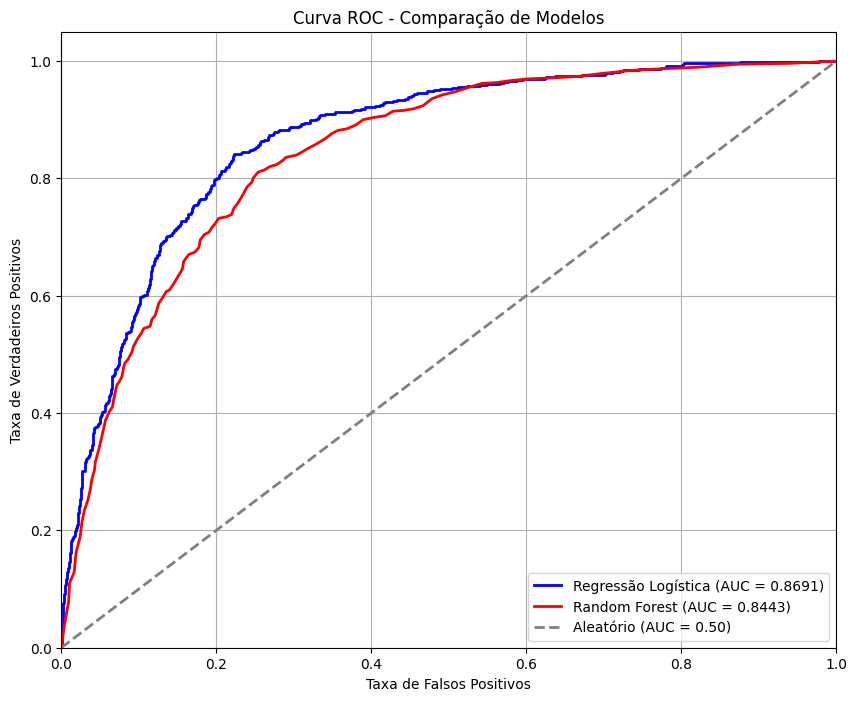

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

# Calcular a Curva e a Área (AUC) para cada Modelo

# Curva ROC para GLM

fpr_glm, tpr_glm, thresholds_glm = roc_curve(y_test, glm_probabilities)
roc_auc_glm = auc(fpr_glm, tpr_glm)

# Curva ROC para Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_probabilities)
roc_auc_rf = auc(fpr_rf, tpr_rf)


# Plotar o Gráfico

plt.figure(figsize=(10, 8))

# Plotar a Curva ROC do GLM
plt.plot(fpr_glm, tpr_glm, color='blue', lw=2,
         label=f'Regressão Logística (AUC = {roc_auc_glm:.4f})')

# Plotar a Curva ROC do RF
plt.plot(fpr_rf, tpr_rf, color='red', lw=2,
         label=f'Random Forest (AUC = {roc_auc_rf:.4f})')

# Plotar a linha do classificador aleatório ## se fossemos escolher aleatoriamente
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--',
         label='Aleatório (AUC = 0.50)')

# Configurações do Gráfico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Comparação de Modelos')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


> Assim como foi visto nos resultados das métricas anteriores, o modelo GLM teve um desempenho levemente superior ao modelo RF, a curva ROC demonstra isso visualmente.

**Tabela de métricas para comparação:**

Tabela contendo todas as métricas de ambos os modelos para comparação final.

In [31]:
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    cohen_kappa_score,
    roc_auc_score,
    recall_score
)
import numpy as np

def calcular_especificidade(y_true, y_pred):
    # tn, fp, fn, tp = True Negative, False Positive, False Negative, True Positive
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    # Especificidade = TN / (TN + FP)
    return tn / (tn + fp)

def get_metrics(y_true, y_pred, y_proba, model_name):
    """Calcula todas as métricas o modelo."""
    return {
        'Modelo': model_name,
        'Acuracia': accuracy_score(y_true, y_pred),
        'Kappa': cohen_kappa_score(y_true, y_pred),
        'Sensibilidade': recall_score(y_true, y_pred),  # Recall da Classe 1
        'Especificidade': calcular_especificidade(y_true, y_pred), # Recall da Classe 0
        'AUC': roc_auc_score(y_true, y_proba)
    }

#Métricas para GLM e RF


#Métricas do GLM
glm_metrics = get_metrics(y_test, glm_predictions, glm_probabilities, 'Regressão Logística (GLM)')

#Métricas do RF
rf_metrics = get_metrics(y_test, rf_predictions, rf_probabilities, 'Random Forest')


#Tabela de Comparação

df_comparacao = pd.DataFrame([glm_metrics, rf_metrics])

print("=" * 70)
print("Tabela de Comparação de Performance dos Modelos GLM e RF")
print("=" * 70)
print(df_comparacao.to_markdown(index=False, floatfmt=".4f"))


Tabela de Comparação de Performance dos Modelos GLM e RF
| Modelo                    |   Acuracia |   Kappa |   Sensibilidade |   Especificidade |    AUC |
|:--------------------------|-----------:|--------:|----------------:|-----------------:|-------:|
| Regressão Logística (GLM) |     0.7910 |  0.5562 |          0.8436 |           0.7672 | 0.8691 |
| Random Forest             |     0.7808 |  0.5040 |          0.7043 |           0.8153 | 0.8443 |


**Impacto de cada uma das variáveis nos modelos:**

In [32]:
import pandas as pd
import numpy as np

# GLM

print("=" * 80)
print("IMPACTO: REGRESSÃO LOGÍSTICA (GLM)")
print("=" * 80)

#DataFrame de Coeficientes
glm_impact = pd.DataFrame({
    'Feature': X_train_balanced.columns,
    'Coeficiente': glm_model.coef_[0],
    # Odds Ratio: e^(Coeficiente) - Indica por quanto o risco de sinistro é multiplicado.
    'Odds Ratio': np.exp(glm_model.coef_[0])
})

# Ordenar
glm_impact['Abs_Coef'] = glm_impact['Coeficiente'].abs()
glm_impact = glm_impact.sort_values(by='Abs_Coef', ascending=False).drop('Abs_Coef', axis=1)

print(glm_impact.to_markdown(index=False, floatfmt=".4f"))

print("\nInterpretação:")
print("- > 1.0: Aumenta o risco de sinistro.")
print("- < 1.0: Diminui o risco de sinistro.")

#RANDOM FOREST
# Importância Gini

print("\n" + "=" * 80)
print("RANDOM FOREST")
print("=" * 80)

rf_impact = pd.DataFrame({
    'Feature': X_train_balanced.columns,
    'Importância (Gini)': rf_model.feature_importances_
})

# Ordenar
rf_impact = rf_impact.sort_values(by='Importância (Gini)', ascending=False)

print(rf_impact.to_markdown(index=False, floatfmt=".4f"))

print("\nInterpretação:")
print("- Valores mais altos indicam que a variável foi mais decisiva para as previsões do modelo.")

IMPACTO: REGRESSÃO LOGÍSTICA (GLM)
| Feature                  |   Coeficiente |   Odds Ratio |
|:-------------------------|--------------:|-------------:|
| driving_experience       |       -1.8319 |       0.1601 |
| vehicle_year_before_2015 |        1.4045 |       4.0734 |
| married_1.0              |       -0.6099 |       0.5434 |
| gender_male              |        0.5125 |       1.6695 |
| credit_score             |        0.5087 |       1.6631 |
| income                   |       -0.3309 |       0.7183 |
| speeding_violations      |        0.2448 |       1.2774 |
| children_1.0             |       -0.2202 |       0.8023 |
| past_accidents           |       -0.1038 |       0.9014 |
| education                |        0.0672 |       1.0695 |
| age                      |        0.0376 |       1.0383 |
| annual_mileage           |        0.0001 |       1.0001 |

Interpretação:
- > 1.0: Aumenta o risco de sinistro.
- < 1.0: Diminui o risco de sinistro.

RANDOM FOREST
| Feature         

# Conclusões e recomendações:

Conforme indicado pelas métricas de avaliação anteriores, o modelo GLM superou ligeiramente o modelo RF, resultado que é corroborado pela análise visual da curva ROC e pelas métricas como Kappa e sensibilidade.

Quanto as variáveis:

GLM: Prioriza driving_experience e vehicle_year_before_2015.

RF: Prioriza credit_score, annual_mileage e age. Isso sugere que a relação dessas variáveis com o risco é provavelmente complexa ou não linear. Por exemplo, talvez o risco aumente acentuadamente apenas acima de uma certa idade ou quilometragem anual, o que o RF (modelo não linear) consegue capturar, mas o GLM (modelo linear) não.

Utilizar outros modelos apenas com variáveis qualitativas ou quantitativas pode ser uma alternativa interessante para as divergências entre os dois modelos.


